<a href="https://colab.research.google.com/github/cglnrdgn/PlantPestDetection/blob/main/MobileNetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


train_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Valid'
test_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Test'


img_width, img_height = 224, 224
num_classes = 12
learning_rate = 0.0001
desired_epochs = [15, 30, 45]
batch_sizes = [32]


output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)

for batch_size in batch_sizes:

    for epoch in desired_epochs:
        base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        combination_folder = os.path.join(output_folder, f'lr_{learning_rate}_bs_{batch_size}_epochs_{epoch}_mobilenet_RMSprop')
        os.makedirs(combination_folder, exist_ok=True)

        checkpoint_filepath = os.path.join(combination_folder, 'best_model.h5')
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=False,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)

        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=[model_checkpoint_callback]
        )


        for current_epoch in desired_epochs:
            if current_epoch <= epoch:
                model_weights_filepath = os.path.join(combination_folder, f'model_weights_epoch_{current_epoch}_bs_{batch_size}.h5')
                model.save_weights(model_weights_filepath)


        history_filepath = os.path.join(combination_folder, f'training_history_bs_{batch_size}.json')
        with open(history_filepath, 'w') as file:
            json.dump(history.history, file)

17225924/17225924 [==============================] - 1s 0us/step
Found 2819 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Epoch 1/15
88/88 [==============================] - ETA: 0s - loss: 1.3790 - accuracy: 0.5884 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 2004s 23s/step - loss: 1.3790 - accuracy: 0.5884 - val_loss: 0.9770 - val_accuracy: 0.6979
Epoch 2/15
88/88 [==============================] - 42s 482ms/step - loss: 0.6945 - accuracy: 0.7890 - val_loss: 0.7367 - val_accuracy: 0.7833
Epoch 3/15
88/88 [==============================] - 41s 464ms/step - loss: 0.5393 - accuracy: 0.8306 - val_loss: 0.6934 - val_accuracy: 0.7792
Epoch 4/15
88/88 [==============================] - 42s 482ms/step - loss: 0.4601 - accuracy: 0.8586 - val_loss: 0.6680 - val_accuracy: 0.7875
Epoch 5/15
88/88 [==============================] - 42s 476ms/step - loss: 0.4163 - accuracy: 0.8698 - val_loss: 0.6461 - val_accuracy: 0.8042
Epoch 6/15
88/88 [==============================] - 41s 468ms/step - loss: 0.3587 - accuracy: 0.8881 - val_loss: 0.7048 - val_accuracy: 0.7688
Epoch 7/15
88/88 [==============================] - 41s 471ms/step - loss: 0.3512 - accuracy: 0.8920 - val_loss: 0.6456 - val_accuracy: 0.8062
Epoch 8/15

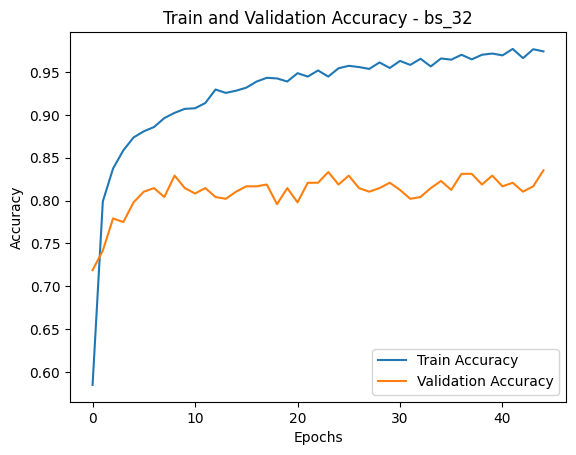

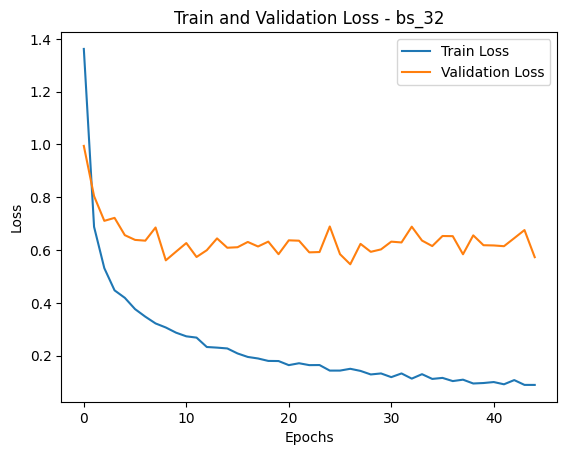

Found 480 images belonging to 12 classes.
15/15 [==============================] - 297s 21s/step


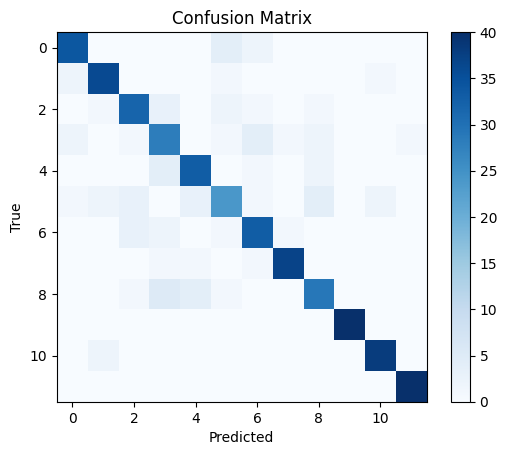

              precision    recall  f1-score   support

        ants       0.87      0.85      0.86        40
        bees       0.88      0.90      0.89        40
      beetle       0.80      0.80      0.80        40
catterpillar       0.65      0.70      0.67        40
  earthworms       0.80      0.82      0.81        40
      earwig       0.71      0.60      0.65        40
 grasshopper       0.77      0.82      0.80        40
        moth       0.95      0.93      0.94        40
        slug       0.76      0.72      0.74        40
       snail       1.00      1.00      1.00        40
        wasp       0.93      0.95      0.94        40
      weevil       0.98      1.00      0.99        40

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



In [ ]:
        from sklearn.metrics import classification_report

        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Train and Validation Accuracy - bs_{batch_size}')
        plt.legend()
        plt.savefig(os.path.join(combination_folder, f'train_val_accuracy_bs_{batch_size}.png'))
        plt.show()

        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Train and Validation Loss - bs_{batch_size}')
        plt.legend()
        plt.savefig(os.path.join(combination_folder, f'train_val_loss_bs_{batch_size}.png'))
        plt.show()

        test_generator = test_datagen.flow_from_directory(
            test_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False)

        model.load_weights(checkpoint_filepath)

        y_pred = model.predict(test_generator)
        y_true = test_generator.classes

        cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        class_names = list(test_generator.class_indices.keys())
        report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names)
        print(report)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

train_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Valid'
test_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Test'

img_width, img_height = 224, 224
num_classes = 12
learning_rate = 0.0001
desired_epochs = [15, 30, 45]
batch_sizes = [32]

output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)

for batch_size in batch_sizes:
    for epoch in desired_epochs:
        base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        combination_folder = os.path.join(output_folder, f'lr_{learning_rate}_bs_{batch_size}_epochs_{epoch}_mobilenet_Adam')
        os.makedirs(combination_folder, exist_ok=True)

        checkpoint_filepath = os.path.join(combination_folder, 'best_model.h5')
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=False,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)


        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=[model_checkpoint_callback]
        )

        for current_epoch in desired_epochs:
            if current_epoch <= epoch:
                model_weights_filepath = os.path.join(combination_folder, f'model_weights_epoch_{current_epoch}_bs_{batch_size}.h5')
                model.save_weights(model_weights_filepath)


        history_filepath = os.path.join(combination_folder, f'training_history_bs_{batch_size}.json')
        with open(history_filepath, 'w') as file:
            json.dump(history.history, file)

Found 2819 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Epoch 1/15
88/88 [==============================] - ETA: 0s - loss: 1.4398 - accuracy: 0.5701

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 44s 471ms/step - loss: 1.4398 - accuracy: 0.5701 - val_loss: 0.9504 - val_accuracy: 0.7312
Epoch 2/15
88/88 [==============================] - 42s 480ms/step - loss: 0.6956 - accuracy: 0.7976 - val_loss: 0.8385 - val_accuracy: 0.7437
Epoch 3/15
88/88 [==============================] - 43s 485ms/step - loss: 0.5376 - accuracy: 0.8375 - val_loss: 0.7358 - val_accuracy: 0.7771
Epoch 4/15
88/88 [==============================] - 42s 480ms/step - loss: 0.4554 - accuracy: 0.8662 - val_loss: 0.6921 - val_accuracy: 0.7958
Epoch 5/15
88/88 [==============================] - 43s 486ms/step - loss: 0.3974 - accuracy: 0.8773 - val_loss: 0.6664 - val_accuracy: 0.8104
Epoch 6/15
88/88 [==============================] - 41s 466ms/step - loss: 0.3711 - accuracy: 0.8863 - val_loss: 0.7096 - val_accuracy: 0.7833
Epoch 7/15
88/88 [==============================] - 42s 475ms/step - loss: 0.3475 - accuracy: 0.8845 - val_loss: 0.6690 - val_accuracy: 0.7833
Epoch 8/15

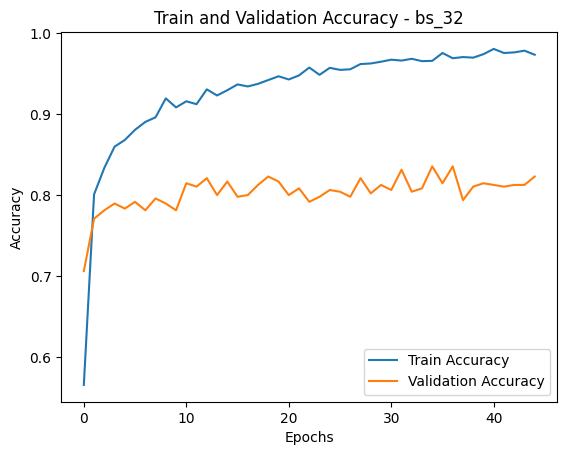

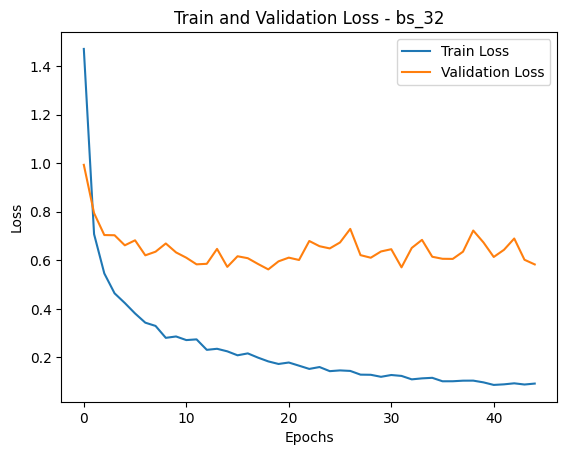

Found 480 images belonging to 12 classes.
15/15 [==============================] - 6s 390ms/step


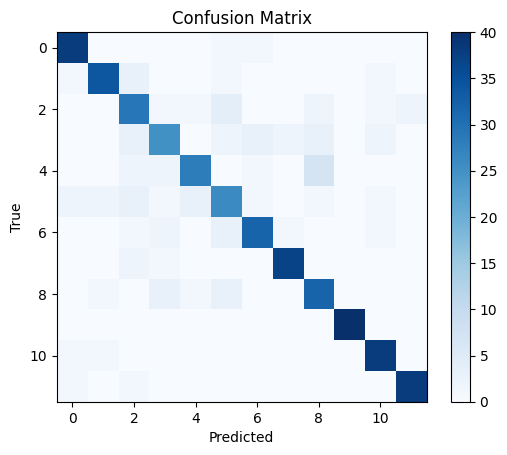

              precision    recall  f1-score   support

        ants       0.88      0.95      0.92        40
        bees       0.89      0.85      0.87        40
      beetle       0.66      0.72      0.69        40
catterpillar       0.71      0.62      0.67        40
  earthworms       0.85      0.70      0.77        40
      earwig       0.65      0.65      0.65        40
 grasshopper       0.84      0.80      0.82        40
        moth       0.93      0.93      0.93        40
        slug       0.71      0.80      0.75        40
       snail       1.00      1.00      1.00        40
        wasp       0.86      0.95      0.90        40
      weevil       0.95      0.95      0.95        40

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480



In [ ]:
        from sklearn.metrics import classification_report


        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Train and Validation Accuracy - bs_{batch_size}')
        plt.legend()
        plt.savefig(os.path.join(combination_folder, f'train_val_accuracy_bs_{batch_size}.png'))
        plt.show()

        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Train and Validation Loss - bs_{batch_size}')
        plt.legend()
        plt.savefig(os.path.join(combination_folder, f'train_val_loss_bs_{batch_size}.png'))
        plt.show()

        test_generator = test_datagen.flow_from_directory(
            test_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False)

        model.load_weights(checkpoint_filepath)

        y_pred = model.predict(test_generator)
        y_true = test_generator.classes

        cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        class_names = list(test_generator.class_indices.keys())
        report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names)
        print(report)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

train_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Valid'
test_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Test'

img_width, img_height = 224, 224
num_classes = 12
learning_rate = 0.0001
desired_epochs = [15, 30, 45]
batch_sizes = [32]


output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)


for batch_size in batch_sizes:
    for epoch in desired_epochs:
        base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        for layer in base_model.layers:
            layer.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        combination_folder = os.path.join(output_folder, f'lr_{learning_rate}_bs_{batch_size}_epochs_{epoch}_mobilenet_SGD')
        os.makedirs(combination_folder, exist_ok=True)

        checkpoint_filepath = os.path.join(combination_folder, 'best_model.h5')
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=False,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)

        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=[model_checkpoint_callback]
        )

        for current_epoch in desired_epochs:
            if current_epoch <= epoch:
                model_weights_filepath = os.path.join(combination_folder, f'model_weights_epoch_{current_epoch}_bs_{batch_size}.h5')
                model.save_weights(model_weights_filepath)

        history_filepath = os.path.join(combination_folder, f'training_history_bs_{batch_size}.json')
        with open(history_filepath, 'w') as file:
            json.dump(history.history, file)

Found 2819 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Epoch 1/15
88/88 [==============================] - ETA: 0s - loss: 2.6320 - accuracy: 0.0764

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 43s 470ms/step - loss: 2.6320 - accuracy: 0.0764 - val_loss: 2.5966 - val_accuracy: 0.0812
Epoch 2/15
88/88 [==============================] - 41s 470ms/step - loss: 2.5617 - accuracy: 0.1015 - val_loss: 2.5633 - val_accuracy: 0.1104
Epoch 3/15
88/88 [==============================] - 41s 466ms/step - loss: 2.5155 - accuracy: 0.1224 - val_loss: 2.4762 - val_accuracy: 0.1375
Epoch 4/15
88/88 [==============================] - 41s 466ms/step - loss: 2.4577 - accuracy: 0.1392 - val_loss: 2.4830 - val_accuracy: 0.1667
Epoch 5/15
88/88 [==============================] - 41s 468ms/step - loss: 2.4194 - accuracy: 0.1575 - val_loss: 2.4071 - val_accuracy: 0.1792
Epoch 6/15
88/88 [==============================] - 40s 457ms/step - loss: 2.3813 - accuracy: 0.1726 - val_loss: 2.3910 - val_accuracy: 0.1708
Epoch 7/15
88/88 [==============================] - 41s 466ms/step - loss: 2.3267 - accuracy: 0.1981 - val_loss: 2.3479 - val_accuracy: 0.2125
Epoch 8/15

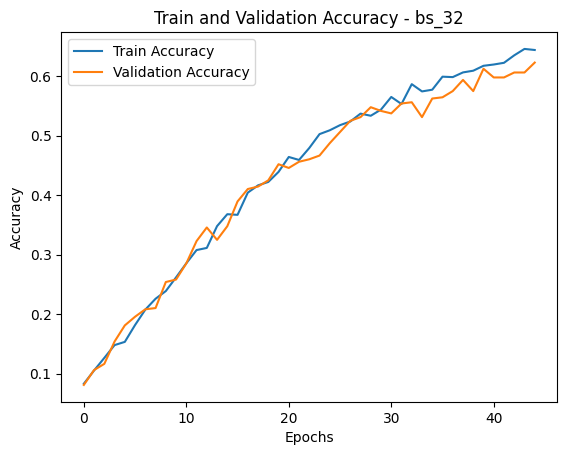

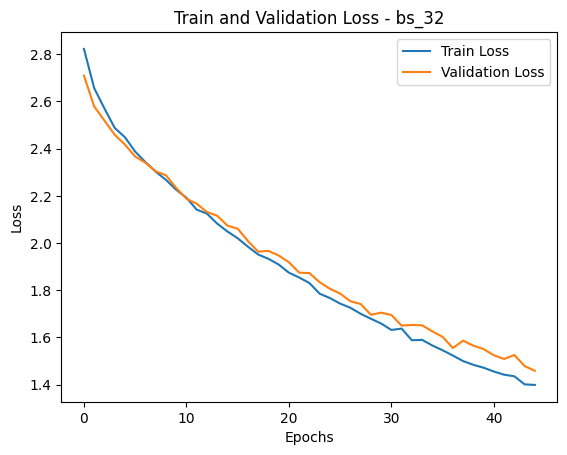

Found 480 images belonging to 12 classes.
15/15 [==============================] - 6s 379ms/step


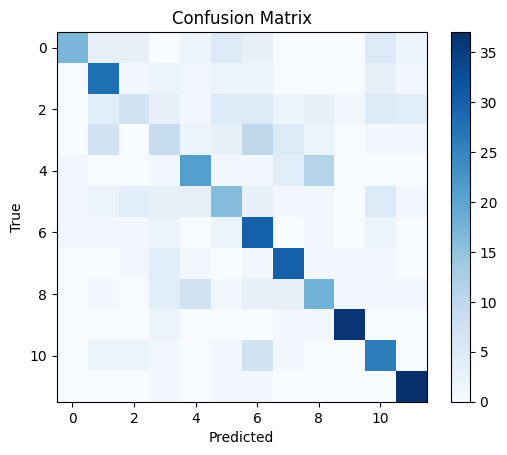

              precision    recall  f1-score   support

        ants       0.85      0.42      0.57        40
        bees       0.58      0.70      0.64        40
      beetle       0.37      0.17      0.24        40
catterpillar       0.28      0.23      0.25        40
  earthworms       0.55      0.53      0.54        40
      earwig       0.43      0.40      0.42        40
 grasshopper       0.45      0.75      0.57        40
        moth       0.64      0.75      0.69        40
        slug       0.47      0.45      0.46        40
       snail       0.92      0.90      0.91        40
        wasp       0.53      0.65      0.58        40
      weevil       0.79      0.93      0.85        40

    accuracy                           0.57       480
   macro avg       0.57      0.57      0.56       480
weighted avg       0.57      0.57      0.56       480



In [ ]:
        from sklearn.metrics import classification_report

        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Train and Validation Accuracy - bs_{batch_size}')
        plt.legend()
        plt.savefig(os.path.join(combination_folder, f'train_val_accuracy_bs_{batch_size}.png'))
        plt.show()

        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Train and Validation Loss - bs_{batch_size}')
        plt.legend()
        plt.savefig(os.path.join(combination_folder, f'train_val_loss_bs_{batch_size}.png'))
        plt.show()

        test_generator = test_datagen.flow_from_directory(
            test_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False)

        model.load_weights(checkpoint_filepath)

        y_pred = model.predict(test_generator)
        y_true = test_generator.classes

        cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        class_names = list(test_generator.class_indices.keys())
        report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names)
        print(report)